# <span style="color:darKred">Data Analysis</span>


Source: ataquestiburones.cvs from https://www.sharkattackfile.net/index.htm

by Jacky Barraza

## <span style="color:dark spring green"> Tabla de Contenido
    
    
1. [Análisis sobre Ataques de Tiburones](#id2)
    
    
2. [Carga del DataFrame](#id3)
    
    
3. [Exploracion de valores del DataFrame e indentifica valores '?'](#id4)
    
    
4. [EDA](#id5)
    
    
4.1 [Inspeccion y Seleccion de data para posterior analisis ](#id6)
    
4.2 [Puntos Claves](#id7)
    
4.3 [Analisis del DataFrame por Variable](#id8)
    
4.3.1 [Variable: Pais, en donde ocurren los ataques](#id9)
    
4.3.2 [Variable: Year, referente a los años cuando sucedieron los ataques](#id10)
    
4.3.3 [Variable: Type, referente al tipo de ataque del tiburon (provocado, no provocado...)](#id11)
    
4.3.4 [Variable: Sex, referente al sexo de las personas atacadas por tiburones](#id12)
    
4.3.5 [Variable: Fatal (Y/N), referente a si el ataque fue fatal o la victima quedo viva](#id13)
    
4.3.6 [Variable: Age, referente a la edad de las personas atacadas por tiburones ](#id14)
    
4.3.7 [Variable: Time, referente a la edad reportada a momento de ataque por tiburones](#id15)
    
4.3.8 [Variable: Species, referente a la especie del tiburon reportada al momento de ataque de tiburon ](#id16)
    
5. [DataFrame Final para correlaciones ](#id17)
    
5.1 [Ha existido algun cambio en el numero de ataques de tiburones a traves de los anos?¶](#id18)
    
5.2 [En que paises ocurren mas ataques de tiburon? ](#id19)
    
5.3 [Las perosnas atacadas por tiburones suelen ser poblacion joven o mayor? ](#id20)
    
5.4 [Que actividades relacionadas con el mar se ven mas expuestas a ataques de tiburones?](#id21)
    
5.5 [Que tiburones atacan mas? ](#id22)
    
5.6 [Son los aqaques de tiburones mayormente fatales? Que especie de tiburon esta mas relacionada con los casos fatales](#id23)
    
5.7 [En que pais se han dados mas casos fatales de ataques de tiburon? ](#id24)
    
5.8 [Existe alguna relacion entre la hora del ataque y si la victimas es fatal?](#id25)
    
5.9 [Los ataques estan mas relacionados a hombres o mujeres? Existe alguna relacion con el sexo y los ataques fatales?](#id26)
    
5.10 [Cuales son las areas de USA, Australia y South Africa mas peligros? ](#id27)
    
6 [Summing Up ](#id28)

## <span style="color:dark spring green"> 1. Análisis sobre Ataques de Tiburones <a name="id3"></a> 


Se cuenta con un dataframe que reune informacion de un timeframe commprendido desde 1750 hasta el 2016. Consta de 5992 row y 16 columnas. 

Se realizara una inspeccion y posterior limpieza del dataframe para seleccionar las variables mas aportan valor en el dataframe.

Importamos las librerias a utilizar para el analisis del DataFrame 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from datetime import datetime 
from collections import Counter

### <span style="color: dark orange"> 1. Carga del DataFrame <a name="id4"></a> 

In [2]:
dfsharkattacks = pd.read_csv('/Users/jackyb/PycharmProjects/Data_Analysis_Ataque_de_Tiburones/data/input/ataquestiburones.csv', encoding="ISO-8859-1")
dfsharkattacks.tail(100)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
5892,ND-0119,Before 1963,0,Unprovoked,DJIBOUTI,Gulf of Tadjoura,NaN,A dhow capsized,Passenger & crew,NaN,NaN,FATAL,Y,NaN,NaN,A. C. Doyle
5893,ND-0118,1896-1913,0,Unprovoked,LIBYA,Cyrenaica,Kirinaiki,Sponge diving,a diver from Kalymnos,M,NaN,FATAL,Y,NaN,NaN,M. Bardanis
5894,ND-0116,Before 1936,0,Unprovoked,AUSTRALIA,NaN,NaN,Net-fishing,August Eichmann,M,NaN,Calf bitten,N,NaN,NaN,"Courier-Mail, 1/11/1936"
5895,ND-0115,Before 08-Jun-1912,0,Unprovoked,NEW ZEALAND,North Island,"Point Halsey, Wellington",NaN,Kai-tawaro,M,NaN,FATAL,Y,NaN,NaN,"Evening Post, 6/8/1912"
5896,nd-0114,Before 2012,0,Unprovoked,NaN,NaN,In a river feeding into the Bay of Bengal,Netting shrimp,Sametra Mestri,F,NaN,Hand severed,N,NaN,NaN,National Georgraphic Television
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
5988,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
5989,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
5990,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"


A continuacion se listan las columnas que se analizaran para determinar el estado del dato y definir que informacion tomar de cada columna. 

In [3]:
print(dfsharkattacks.columns.values)

['Case Number' 'Date' 'Year' 'Type' 'Country' 'Area' 'Location' 'Activity'
 'Name' 'Sex ' 'Age' 'Injury' 'Fatal (Y/N)' 'Time' 'Species '
 'Investigator or Source']


## <span style="color:dark spring green"> 2. EDA <a name="id5"></a> 

### <span style="color: dark orange"> 3. Inspeccion y Seleccion de data para posterior analisis <a name="id6"></a> 

Explorando el dataframe (df) observamos que un df de 5992 rowa y 16 columnas, con tipo de datos tando int y objects

In [4]:
dfsharkattacks.info #revisamos los tipos de datos que tenemos,e identificamos inf disponible para empezar a variables
                      #para empezar a identificar variables a utilizar para el analisis

<bound method DataFrame.info of        Case Number         Date  Year        Type             Country  \
0     2016.09.18.c  18-Sep-2016  2016  Unprovoked                 USA   
1     2016.09.18.b  18-Sep-2016  2016  Unprovoked                 USA   
2     2016.09.18.a  18-Sep-2016  2016  Unprovoked                 USA   
3       2016.09.17  17-Sep-2016  2016  Unprovoked           AUSTRALIA   
4       2016.09.15  16-Sep-2016  2016  Unprovoked           AUSTRALIA   
...            ...          ...   ...         ...                 ...   
5987       ND.0005  Before 1903     0  Unprovoked           AUSTRALIA   
5988       ND.0004  Before 1903     0  Unprovoked           AUSTRALIA   
5989       ND.0003    1900-1905     0  Unprovoked                 USA   
5990       ND.0002    1883-1889     0  Unprovoked              PANAMA   
5991       ND.0001    1845-1853     0  Unprovoked  CEYLON (SRI LANKA)   

                   Area                             Location      Activity  \
0            

In [5]:
dfsharkattacks.dtypes #revisamos los tipos de datos que tenemos,e identificamos inf disponible para empezar a variables
                      #para empezar a identificar variables a utilizar para el analisis

Case Number               object
Date                      object
Year                       int64
Type                      object
Country                   object
Area                      object
Location                  object
Activity                  object
Name                      object
Sex                       object
Age                       object
Injury                    object
Fatal (Y/N)               object
Time                      object
Species                   object
Investigator or Source    object
dtype: object

**Nota:** La mayoria de las columnas se presenta como dato tipo objeto, lo que implica realizar modificaciones en las columnas de acuerdo al dato para poder manipularlas.

[Volver al Inicio.](#id3)

In [6]:
dfsharkattacks.isnull().sum() # revisamos el total de los NaN en el df

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
dtype: int64

### <span style="color: dark orange"> 4. Puntos Claves<a name="id7"></a> 

Explorando el dataframe (df) observamos los valores NaN por columna. La columna que tiene mas valores NaN es Time, reresentando un 53%. Seguidamente la variable Species con 48% y la variable Age con 44%. Mas adelante se analizaran estas columnas para saber si se trabajaran con ellas ene l análisis del df.

Se procede a hacer una copia de dataframe original para la limpieza de los datos por variable. Las variables a considerar luego de estudiar el dataframe seran:

Year, Time, Country, Area, Species, Activity, Sex, Age, Fatal.

Estas **variables** se analizaran posteriormente para resolver las siguientes preguntas:

1. Ha existido algun cambio en el numeor de ataques de tiburones a traves de los anos?
2. En que paises ocurren mas ataques de tiburon?
3. Las perosnas atacadas por tiburones suelen ser poblacion joven o mayor? 
4. Que actividades relacionadas con el mar se ven mas expuestas a ataques de tiburones?
5. Que tiburones atacan mas?
6. Son los aqaques de tiburones mayormente fatales? Que especie de tiburon esta mas relacionada con laos casos fatales
7. En que pais se han dados mas casos fatales de ataques de tiburon?
8. Existe alguna relacion entre la hora del ataque y si la victimas es fatal?
9. Los ataques estan mas relacionados a hombres o mujeres? Existe alguna relacion con el sexo y los ataques fatales?

In [7]:
dfsharkatt = dfsharkattacks.copy()
dfsharkatt.head(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2016.09.18.c,18-Sep-2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016"
1,2016.09.18.b,18-Sep-2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016"
2,2016.09.18.a,18-Sep-2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016"


## <span style="color:dark spring green">5. Analisis del DataFrame por Variable<a name="id8"></a> 

### <span style="color: dark orange">5.1 Variable: Pais, en donde ocurren los ataques<a name="id9"></a> 

Obsefvampos que la cariable Country tiene **43 valores NaN**. Este valor es despreciable con respecto al total de la muestra. Por la cantidad de diversos paises, esta variable no se modificara, se ira filtrando asociado a los valores de las otras variables.

Realizamos un histograma de los datos para observar su distribucion.

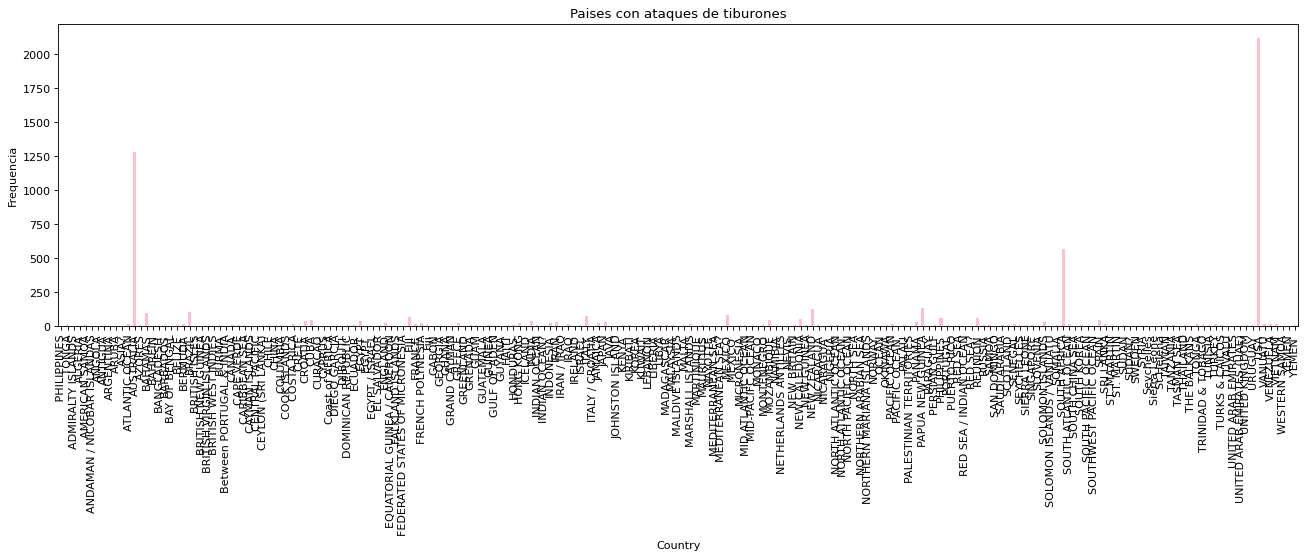

In [8]:
plt.figure(figsize=(20, 5), dpi=80)
plt.title('Paises con ataques de tiburones')
plt.xlabel('Paises')
plt.ylabel('Frequencia')
plt.xticks(rotation='vertical')
dfsharkatt['Country'].groupby(dfsharkatt['Country']).count().plot(kind='bar', color="pink")
plt.show()

Observamos que 3 paises son los que mas aportan al dataframe con alrededor del 70% del dataframe. 

### <span style="color: dark orange">5.2 Variable: Year, referente a los años cuando sucedieron los ataques <a name="id10"></a> 

Procedemos a hacer un histograma para observar la distribucion de los valores. Esta variable no cuenta con valores NaN.

<AxesSubplot:title={'center':'Year of Attacs'}, xlabel='Years', ylabel='Frequencia'>

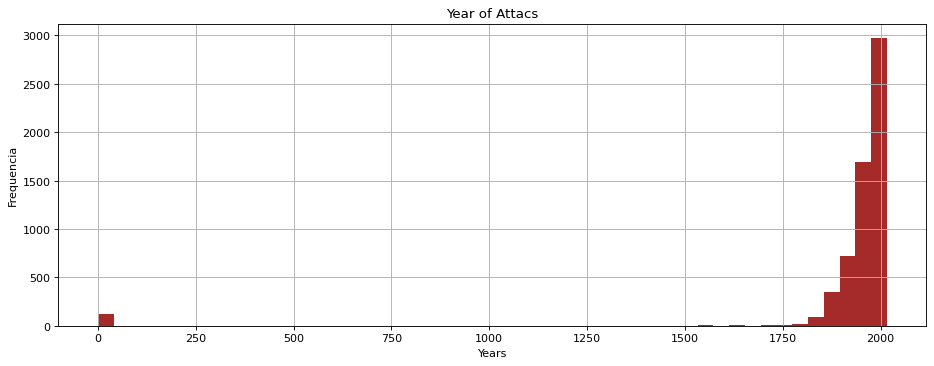

In [9]:
plt.figure(figsize=(14, 5), dpi=80)
plt.title('Year of Attacs')
plt.xlabel('Years')
plt.ylabel('Frequencia')
dfsharkatt['Year'].hist(bins=50,color="brown")

Claramente vemos que los valores estan acumulados entre 0 y 2000, asi que procedemos a limpiar estas columnas que se pueden depreciar para este analisis.

In [10]:
dfsharkatt_c1 = dfsharkatt.copy()
dfsharkatt_c1['Date'] = pd.to_datetime(dfsharkatt['Date'], errors='coerce', format='%d-%b-%Y')
dfsharkatt_c1 = dfsharkatt_c1[dfsharkatt_c1['Date'] > '1750-01-01']
dfsharkatt_c1.tail(3)
#dfsharkatt_c1.shape

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
5828,1807.01.12,1807-01-12,1807,Unprovoked,AUSTRALIA,New South Wales,"Cockle Bay, Sydney Harbour",NaN,male,M,NaN,Survived,N,NaN,NaN,"J. Green, p.31"
5834,1788.05.10,1788-05-10,1788,Boat,AUSTRALIA,New South Wales,Sydney Harbor,Fishing,boat,NaN,NaN,"No injury to occupants, shark bit oar and rudder",N,NaN,NaN,"G.P. Whitley citing J. Cobley, Sydney Cove, p...."
5835,1787.07.05,1787-07-05,1787,Unprovoked,St Helena,NaN,Landing Place,Swimming,Private Isaac Hicksled,M,NaN,FATAL,Y,NaN,NaN,"H.R. Janisch (1885), Extracts from the St. Hel..."


<AxesSubplot:title={'center':'Year of Attacs'}, xlabel='Years', ylabel='Frequencia'>

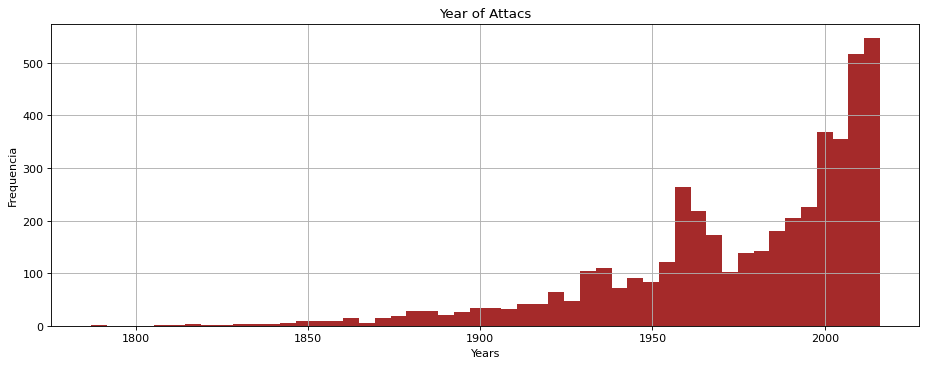

In [11]:
plt.figure(figsize=(14, 5), dpi=80)
plt.title('Year of Attacs')
plt.xlabel('Years')
plt.ylabel('Frequencia')
dfsharkatt_c1['Year'].hist(bins=50, color="brown")

En el histograma observado arriba se muestran los valores solo con las fechas mayores a 1750-01-01, se procedera a repetir el procedimiento para eliminar los valores menores a 1925. 

<AxesSubplot:title={'center':'Year of Attacs'}, xlabel='Years', ylabel='Frequencia'>

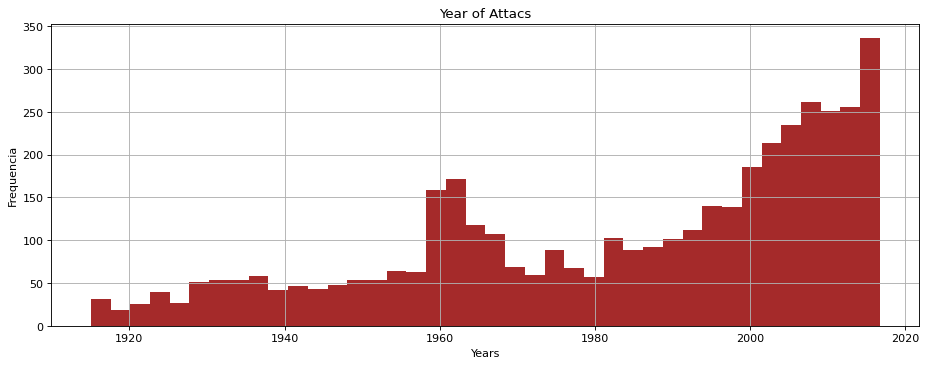

In [12]:
dfsharkatt_c2 = dfsharkatt_c1.copy()
dfsharkatt_c2['Date'] = pd.to_datetime(dfsharkatt['Date'], errors='coerce', format='%d-%b-%Y')
dfsharkatt_c2 = dfsharkatt_c1[dfsharkatt_c1['Date'] > '1915-01-01']
plt.figure(figsize=(14, 5), dpi=80)
plt.title('Year of Attacs')
plt.xlabel('Years')
plt.ylabel('Frequencia')
dfsharkatt_c2['Date'].hist(bins=40, color="brown")

Como observamos seleccionando los datos desde 1915 en adelante, hemos reducido las entradas de 5992 a 4178, implicando una reduccion del 30% del dataframe. Esta muestra se considera representativa para este análisis.

In [13]:
dfsharkatt_c2.shape

(4178, 16)

[Volver al Inicio.](#id3)

### <span style="color: dark orange">5.3 Variable: Type, referente al tipo de ataque del tiburon (provocado, no provocado...) <a name="id11"></a> 

Esta variable esta asociada al tipo de ataque, considerando desatres naturales, o provocado o no provocados. Los datos referente a Boat y Boating, se asociaran a una sola clase llamada Boating. 

In [14]:
list(dfsharkatt_c2['Type'].unique()) 

['Unprovoked', 'Boat', 'Provoked', 'Invalid', 'Sea Disaster', 'Boating']

In [15]:
dfsharkatt_c2['Type_c'] = dfsharkatt_c2['Type'].apply(lambda x:'Boating' if x == 'Boat' else x)


/var/folders/n6/j21lbj9j5d7g08lzjp8wjt_w0000gn/T/ipykernel_28988/4170361440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsharkatt_c2['Type_c'] = dfsharkatt_c2['Type'].apply(lambda x:'Boating' if x == 'Boat' else x)


<AxesSubplot:title={'center':'Shark Attacs Type'}, xlabel='Type', ylabel='Frequency'>

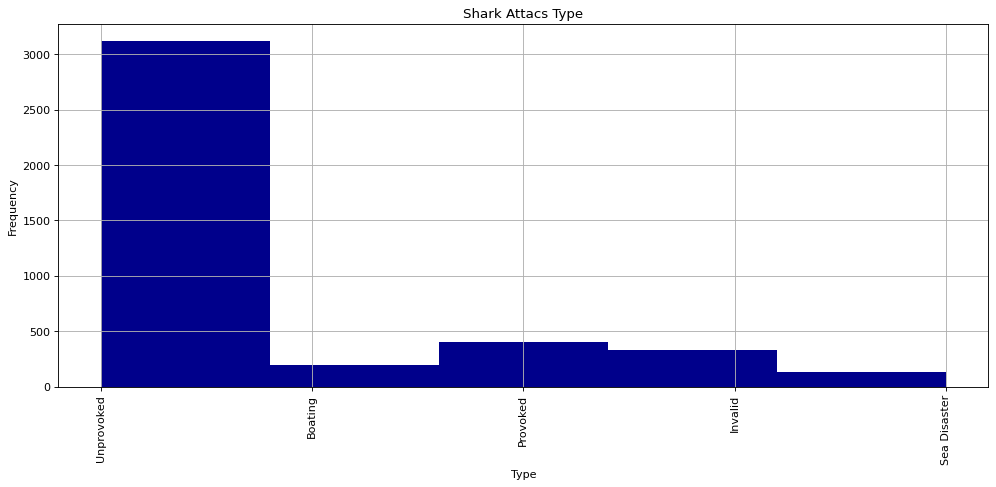

In [16]:
plt.figure(figsize=(15, 6), dpi=80)
plt.title('Shark Attacs Type')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
dfsharkatt_c2['Type_c'].hist(bins=5, color="darkblue")

### <span style="color: dark orange"> 5.4 Variable: Sex, referente al sexo de las personas atacadas por tiburones<a name="id12"></a> 

Esta variable cuenta con 567 volores NaN. Por los momentos no se eliminaran, pero se unificaran las clases mostradas en esta. 

In [17]:
dfsharkatt_c2['Sex_c']=dfsharkatt_c2['Sex ']
list(dfsharkatt_c2['Sex_c'].unique())
#dfsharkatt_c3=dfsharkatt_c2.copy()

/var/folders/n6/j21lbj9j5d7g08lzjp8wjt_w0000gn/T/ipykernel_28988/2052631375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsharkatt_c2['Sex_c']=dfsharkatt_c2['Sex ']


['M', nan, 'F', 'M ', 'lli', 'N']

In [18]:
dfsharkatt_c2['Sex_c'] = dfsharkatt_c2['Sex_c'].apply(lambda x: x if x == 'F'or x=='M' else np.nan)
list(dfsharkatt_c2['Sex_c'].unique())

/var/folders/n6/j21lbj9j5d7g08lzjp8wjt_w0000gn/T/ipykernel_28988/3734282718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsharkatt_c2['Sex_c'] = dfsharkatt_c2['Sex_c'].apply(lambda x: x if x == 'F'or x=='M' else np.nan)


['M', nan, 'F']

<AxesSubplot:title={'center':'Shark Attacs Type'}, xlabel='Type', ylabel='Frequency'>

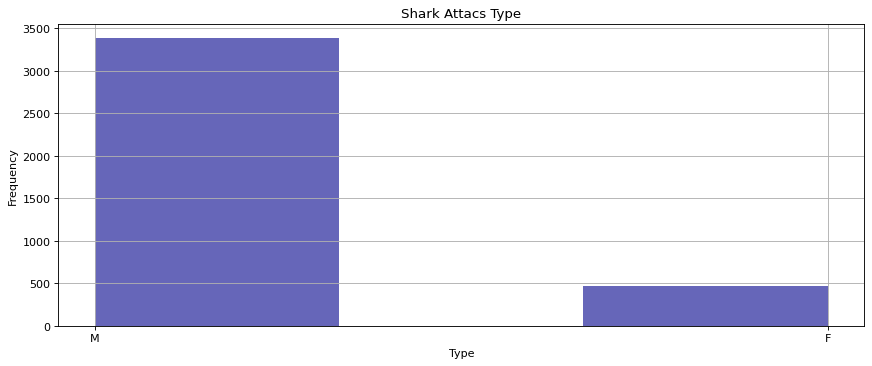

In [19]:
plt.figure(figsize=(13, 5), dpi=80)
plt.title('Shark Attacs Type')
plt.xlabel('Type')
plt.ylabel('Frequency')
dfsharkatt_c2['Sex_c'].hist(bins=3, color="darkblue", alpha= 0.6)

En el histograma observamos una dominancia de ataques a hombres.

### <span style="color: dark orange">5.5 Variable: Fatal (Y/N), referente a si el ataque fue fatal o la victima quedo viva <a name="id13"></a> 

Lo primero es hacer un histograma con los datos para observar como se distribuyen. Esta variable originalmente tenia 19 valos NaN, despues de las modificaciones realizadas en Date, restan 7 NaN valore. Solo porcederemos a unificar las clases que presenta esta variable.

In [20]:
dfsharkatt_c2['Fatal (Y/N)'].isnull().sum()

7

In [21]:
list(dfsharkatt_c2['Fatal (Y/N)'].unique()) 

['N', 'Y', nan, 'UNKNOWN', ' N']

In [22]:
dfsharkatt_c2['Fatal_c'] = dfsharkatt_c2['Fatal (Y/N)'].apply(
    lambda x: x if x == 'N' or x == 'Y' or x == ' N'
    else np.nan)

/var/folders/n6/j21lbj9j5d7g08lzjp8wjt_w0000gn/T/ipykernel_28988/3221624303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsharkatt_c2['Fatal_c'] = dfsharkatt_c2['Fatal (Y/N)'].apply(


In [23]:
dfsharkatt_c2['Fatal_c'] = dfsharkatt_c2['Fatal_c'].replace([' N'], ['N'])
list(dfsharkatt_c2['Fatal_c'].unique()) 

/var/folders/n6/j21lbj9j5d7g08lzjp8wjt_w0000gn/T/ipykernel_28988/2424741752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsharkatt_c2['Fatal_c'] = dfsharkatt_c2['Fatal_c'].replace([' N'], ['N'])


['N', 'Y', nan]

<AxesSubplot:title={'center':'Shark Attacs Type'}, xlabel='Type', ylabel='Frequency'>

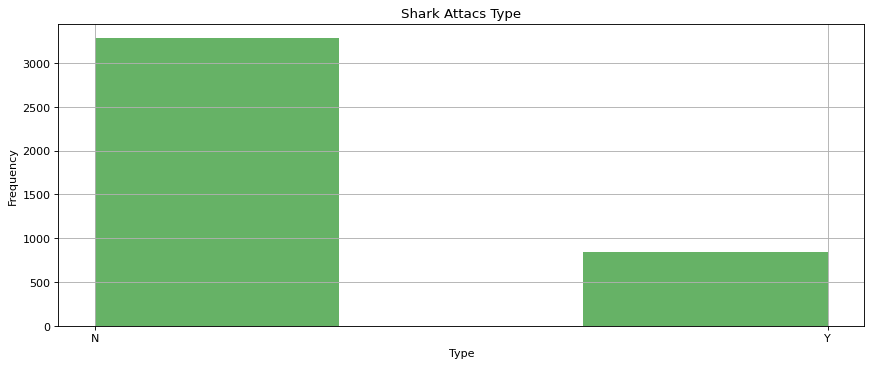

In [24]:
plt.figure(figsize=(13, 5), dpi=80)
plt.title('Shark Attacs Type')
plt.xlabel('Type')
plt.ylabel('Frequency')
dfsharkatt_c2['Fatal_c'].hist(bins=3, color="green",alpha= 0.6 )

En el histograma se muestra una predominancia del reporte de los ataques como no fatales.

### <span style="color: dark orange"> 5.6 Variable: Age, referente a la edad de las personas atacadas por tiburones<a name="id14"></a> 

Esta columna presenta en el dataframe original 2681 valores NaN, luego de las modificaciones en Date, restan 1298 valores, los cual es bastante significativo. Esta columna posee valores numericos al igual que letras. Se procede a depurar la columna sin borrar los NaN, tratando de conservar los mas valores posibles.

In [25]:
dfsharkatt_c2['Age'].isnull().sum()

1280

In [26]:
dfsharkatt_c2['Age'] = dfsharkatt_c2['Age'].apply(lambda x: '1' if x == '18 months' else x)
dfsharkatt_c2['Age'] = dfsharkatt_c2['Age'].apply(lambda x: '27' if x == '28 & 26' else x)
dfsharkatt_c2['Age'] = dfsharkatt_c2['Age'].apply(lambda x: '19' if x == '18 or 20' else x)
dfsharkatt_c2['Age'] = dfsharkatt_c2['Age'].apply(lambda x: '16' if x == 'Teens' else x)
dfsharkatt_c2['Age'] = dfsharkatt_c2['Age'].apply(lambda x: '30' if x == '36 & 26' else x)
dfsharkatt_c2['Age'] = dfsharkatt_c2['Age'].apply(lambda x: '70' if x == 'Elderly' else x)
dfsharkatt_c2['Age'] = dfsharkatt_c2['Age'].apply(lambda x: '40' if x == 'adult' or x== '(adult)' else x)
dfsharkatt_c2['Age'] = dfsharkatt_c2['Age'].apply(lambda x: '40' if x == "young" or x== 'young' else x)

dfsharkatt_c2["Age_c"] = dfsharkatt_c2['Age'].str.extract("([0-9]+)", expand=False)
#dfsharkatt_c2.head(4)

/var/folders/n6/j21lbj9j5d7g08lzjp8wjt_w0000gn/T/ipykernel_28988/829533783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsharkatt_c2['Age'] = dfsharkatt_c2['Age'].apply(lambda x: '1' if x == '18 months' else x)
/var/folders/n6/j21lbj9j5d7g08lzjp8wjt_w0000gn/T/ipykernel_28988/829533783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsharkatt_c2['Age'] = dfsharkatt_c2['Age'].apply(lambda x: '27' if x == '28 & 26' else x)
/var/folders/n6/j21lbj9j5d7g08lzjp8wjt_w0000gn/T/ipykernel_28988/829533783.

In [27]:
#list(dfsharkatt_c2['Age_c'].unique()) 

In [28]:
dfsharkatt_c2['Age_c'].isnull().sum()

1298

La edad de las personas atacadas por tiburones presenta un 50% con valores y un 50% sin valores, estos ultimos han sido sustituidos por "zero". Se decide limpiar el "tail" de los valores del histograma a partir de 55 anos. 

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

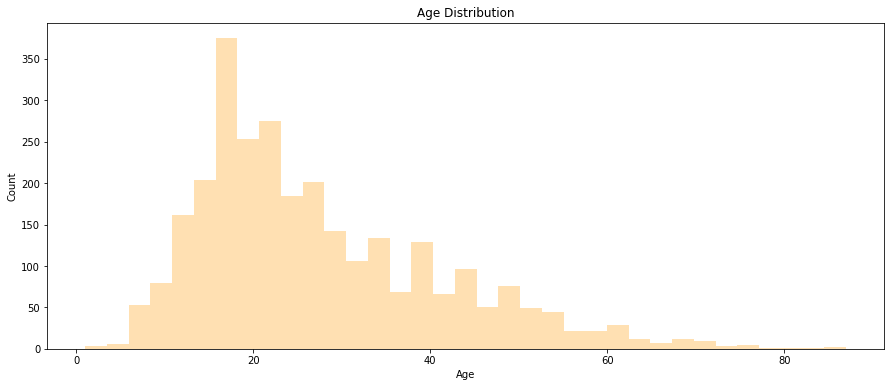

In [29]:
fig,ax = plt.subplots(figsize=(15,6))
ax = sns.distplot(dfsharkatt_c2['Age_c'].dropna().astype(np.int32),
             ax=ax,
             hist_kws={"alpha": 0.6, "color": "#ffcc80"},
             kde=False,bins=35)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

En el histograma se muestra un sesgo de edad entre 18 y 30 anos, indicando que los ataques suelen suceder a personas entre estas edades.

### <span style="color: dark orange">5.7 Variable: Time, referente a la edad reportada a momento de ataque por tiburones<a name="id15"></a> 

Esta columna en el dataframe original presentaba 3213 valores NaN, luego de las modificaciones en la columna Date, contamos con 2012 valores. 

Para mejor manejo de esta variable, y conservar el input, se haran modificaciones referentes al tiempo descrito en letra. Early Morning < 09:00 , Morning 09:00 - 12:00, Afternoon 12:00 - 16:00, Late afternoon 16:00 - 18:00, Evening 18:00 20:00, Late evening 20:00 - 23:59.

In [30]:
dfsharkatt_c2['Time_c'] = dfsharkatt_c2['Time']

/var/folders/n6/j21lbj9j5d7g08lzjp8wjt_w0000gn/T/ipykernel_28988/4107721355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsharkatt_c2['Time_c'] = dfsharkatt_c2['Time']


In [31]:
dfsharkatt_c2['Time_c'] = dfsharkatt_c2['Time_c'].apply(lambda x: '10' if x == 'Noon' or x == 'Noon' or  x =='Midday' or x =='AM'or x =='A.M.'or x == 'Lunchtime' or x =='Late morning' or x == 'Mid-morning'or x == 'X' else x)
dfsharkatt_c2['Time_c'] = dfsharkatt_c2['Time_c'].apply(lambda x: '07' if x == 'Sometime between 06h00 & 08hoo' or x == 'Early Morning' or x =='Shortly after midnight' or x == '2 hours after Opperman' or x =='30 minutes after 1992.07.08.a' else x)
dfsharkatt_c2['Time_c'] = dfsharkatt_c2['Time_c'].apply(lambda x: '17' if x == 'Dawn' or  x == 'Sunset' or  x =='Just before sundown' or  x == 'Nightfall' or  x =='Dark'or  x =='night' or  x =='"shortly before dusk"' else x)
dfsharkatt_c2['Time_c'] = dfsharkatt_c2['Time_c'].apply(lambda x: '15' if x == 'After noon' or x == 'Early afternoonelse ' or x =='Just before noon' or x == 'Mid afternoon' else x)
dfsharkatt_c2['Time_c'] = dfsharkatt_c2['Time_c'].apply(lambda x: '20' if x == 'Dusk' or  x =='After Dusk' or  x =='"Evening"' or  x =='"Night"' or  x == 'Daybreak'or  x == 'Midnight' else x)
dfsharkatt_c2['Time_c'] = dfsharkatt_c2['Time_c'].apply(lambda x: '11' if x == 'After midnight' or  x =='"After dark"' else x)


/var/folders/n6/j21lbj9j5d7g08lzjp8wjt_w0000gn/T/ipykernel_28988/4219127417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsharkatt_c2['Time_c'] = dfsharkatt_c2['Time_c'].apply(lambda x: '10' if x == 'Noon' or x == 'Noon' or  x =='Midday' or x =='AM'or x =='A.M.'or x == 'Lunchtime' or x =='Late morning' or x == 'Mid-morning'or x == 'X' else x)
/var/folders/n6/j21lbj9j5d7g08lzjp8wjt_w0000gn/T/ipykernel_28988/4219127417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsharkatt_c2['Time_c'] = dfsha

In [32]:
#dfsharkatt_c2.head(5)

In [33]:
#list(dfsharkatt_c2['Time_c'].unique()) 

In [34]:
dfsharkatt_c2['Time_c'] = dfsharkatt_c2['Time_c'].str.extract("([0-9]+)", expand=False)
dfsharkatt_c2.head(3)

/var/folders/n6/j21lbj9j5d7g08lzjp8wjt_w0000gn/T/ipykernel_28988/1115177491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsharkatt_c2['Time_c'] = dfsharkatt_c2['Time_c'].str.extract("([0-9]+)", expand=False)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Type_c,Sex_c,Fatal_c,Age_c,Time_c
0,2016.09.18.c,2016-09-18,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",Unprovoked,M,N,16,13
1,2016.09.18.b,2016-09-18,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",Unprovoked,M,N,36,11
2,2016.09.18.a,2016-09-18,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",Unprovoked,M,N,43,10


In [35]:
dfsharkatt_c2['Time_c'].isnull().sum()

2012

In [36]:
#list(dfsharkatt_c2['Time_c'].unique()) 

In [37]:
dfsharkatt_c2['Time_c'] = dfsharkatt_c2['Time_c'].apply(lambda x: '02' if x == '2' else x)
dfsharkatt_c2['Time_c'] = dfsharkatt_c2['Time_c'].apply(lambda x: '08' if x == '8' else x)
dfsharkatt_c2['Time_c'] = dfsharkatt_c2['Time_c'].apply(lambda x: '16' if x == '1600' else x)
dfsharkatt_c2['Time_c'] = dfsharkatt_c2['Time_c'].apply(lambda x: '05' if x == '0500' else x)
dfsharkatt_c2['Time_c'] = dfsharkatt_c2['Time_c'].apply(lambda x: '08' if x == '0830' else x)
dfsharkatt_c2['Time_c'] = dfsharkatt_c2['Time_c'].apply(lambda x: '13' if x == '1300' else x)
dfsharkatt_c2['Time_c'] = dfsharkatt_c2['Time_c'].apply(lambda x: '20' if x == '2000' else x)

/var/folders/n6/j21lbj9j5d7g08lzjp8wjt_w0000gn/T/ipykernel_28988/64252945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsharkatt_c2['Time_c'] = dfsharkatt_c2['Time_c'].apply(lambda x: '02' if x == '2' else x)
/var/folders/n6/j21lbj9j5d7g08lzjp8wjt_w0000gn/T/ipykernel_28988/64252945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsharkatt_c2['Time_c'] = dfsharkatt_c2['Time_c'].apply(lambda x: '08' if x == '8' else x)
/var/folders/n6/j21lbj9j5d7g08lzjp8wjt_w0000gn/T/ipykernel_28988/64252945.py:3

In [38]:
#list(dfsharkatt_c2['Time_c'].unique())

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Time Distribution')

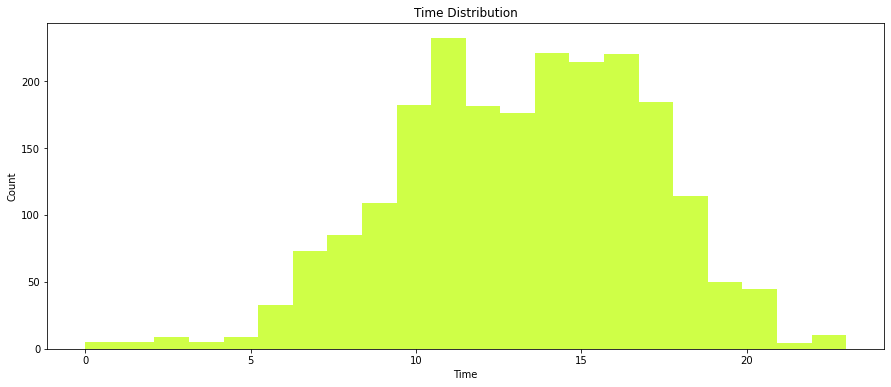

In [39]:
fig,ax = plt.subplots(figsize=(15,6))
ax = sns.distplot(dfsharkatt_c2['Time_c'].dropna().astype(np.int32),
             ax=ax,
             hist_kws={"alpha": 0.9, "color": "#CAFF33"},
             kde=False,bins=22)
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Time Distribution')

Despues de tener la data limpia de la columna Time, el histograma muesta una preferencia marcada de los ataques alrededor de las 15:00 horas y las 11hrs.

[Volver al Inicio.](#id3)

### <span style="color: dark orange"> 5.8 Variable: Species, referente a la especie del tiburon reportada al momento de ataque de tiburon <a name="id16"></a> 


El dataframe orignal tiene 2934 values NaN, despues de las modificaciones en la columna Date, restan 1687 valores NaN. Por la importancia que tiene esta columna para el analisis, se procedera a unificar nombres de las especies. Y se asumiran las descripciones dadas como las especies de tiburon.

In [40]:
dfsharkatt_c2['Species '].isnull().sum()

1687

In [41]:
#list(dfsharkatt_c2['Species '].unique())
dfsharkatt_c3=dfsharkatt_c2.copy()

In [42]:
dfsharkatt_c3['Species_c'] = dfsharkatt_c3['Species ']
#list(dfsharkatt_c2['Species '].unique())

In [43]:
dfsharkatt_c3['Species_c1'] = dfsharkatt_c3['Species_c'].str.extract('([A-Z].\w{0,})', expand=True)
dfsharkatt_c3['Species_c1'] = dfsharkatt_c3['Species_c1'].astype(str) + ' Shark'

dfsharkatt_c3['Species_c1'] = dfsharkatt_c3['Species_c1'].apply(lambda x: np.NaN if x == 'nan Shark' else x)
dfsharkatt_c3['Species_c1'] = dfsharkatt_c3['Species_c1'].apply(lambda x: 'NaN' if x == 'No Shark' or x == 'Not Shark' else x)
dfsharkatt_c3['Species_c1'] = dfsharkatt_c3['Species_c1'].apply(lambda x: 'Small Shark' if x == 'A small Shark' or x == 'A 2 Shark'else x)
dfsharkatt_c3['Species_c1'] = dfsharkatt_c3['Species_c1'].apply(lambda x: 'Bull Shark' if x == 'A bull Shark' else x)
dfsharkatt_c3['Species_c1'] = dfsharkatt_c3['Species_c1'].apply(lambda x: 'Large Shark' if x == 'A 10 Shark' or x == 'Possibly Shark' or x == 'A large Shark' or x ==  'A long Shark' else x)
dfsharkatt_c3['Species_c1'] = dfsharkatt_c3['Species_c1'].apply(lambda x: 'Unknown Shark' if x == 'On Shark' or x == 'Mr Shark' or x == 'C. Shark' else x)
dfsharkatt_c3['Species_c1'] = dfsharkatt_c3['Species_c1'].apply(lambda x: 'Unknown Shark' if x == 'C. Shark' or x == 'Possibily Shark'or x == 'Questionable Shark'or x == 'Unidentified Shark' or x== 'Hand Shark' else x)
dfsharkatt_c3['Species_c1'] = dfsharkatt_c3['Species_c1'].apply(lambda x: 'Unknown Shark' if x == 'A  Shark' or x == 'Species Shark' or x == 'Tooth Shark' or x == 'Though Shark' or x == 'Local Shark' else x)
dfsharkatt_c3['Species_c1'] = dfsharkatt_c3['Species_c1'].apply(lambda x: 'Unknown Shark' if x == 'Probable Shark' or x == 'Remains Shark' or x == 'Two Shark' or x == 'K. Shark' or x == 'M. Shark' or x == 'Mr Shark' else x)
dfsharkatt_c3['Species_c1'] = dfsharkatt_c3['Species_c1'].apply(lambda x: 'Unknown Shark' if x == 'Believed Shark'or x == 'Juvenile Shark' or x =='A pack Shark' or x =='Next Shark' or x == 'Horn Shark' else x)
dfsharkatt_c3['Species_c1'] = dfsharkatt_c3['Species_c1'].apply(lambda x: 'Unknown Shark' if x == 'Next Shark' or x == 'Five Shark' or x == 'According Shark'or x == 'A hammerhead Shark' else x)
dfsharkatt_c3['Species_c1'] = dfsharkatt_c3['Species_c1'].apply(lambda x: 'Unknown Shark' if x == 'Sharks Shark' or x == 'The Shark' or x == 'His Shark'or x == 'Moreno Shark'or x == 'Mitchell Shark'else x)


In [44]:
dfsharkatt_c3.head(2)
#list(dfsharkatt_c2['Species_c1'].unique())

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Time,Species,Investigator or Source,Type_c,Sex_c,Fatal_c,Age_c,Time_c,Species_c,Species_c1
0,2016.09.18.c,2016-09-18,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,13h00,NaN,"Orlando Sentinel, 9/19/2016",Unprovoked,M,N,16,13,NaN,NaN
1,2016.09.18.b,2016-09-18,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,11h00,NaN,"Orlando Sentinel, 9/19/2016",Unprovoked,M,N,36,11,NaN,NaN


<AxesSubplot:title={'center':'Shark Attacs Type'}, xlabel='Type', ylabel='Frequency'>

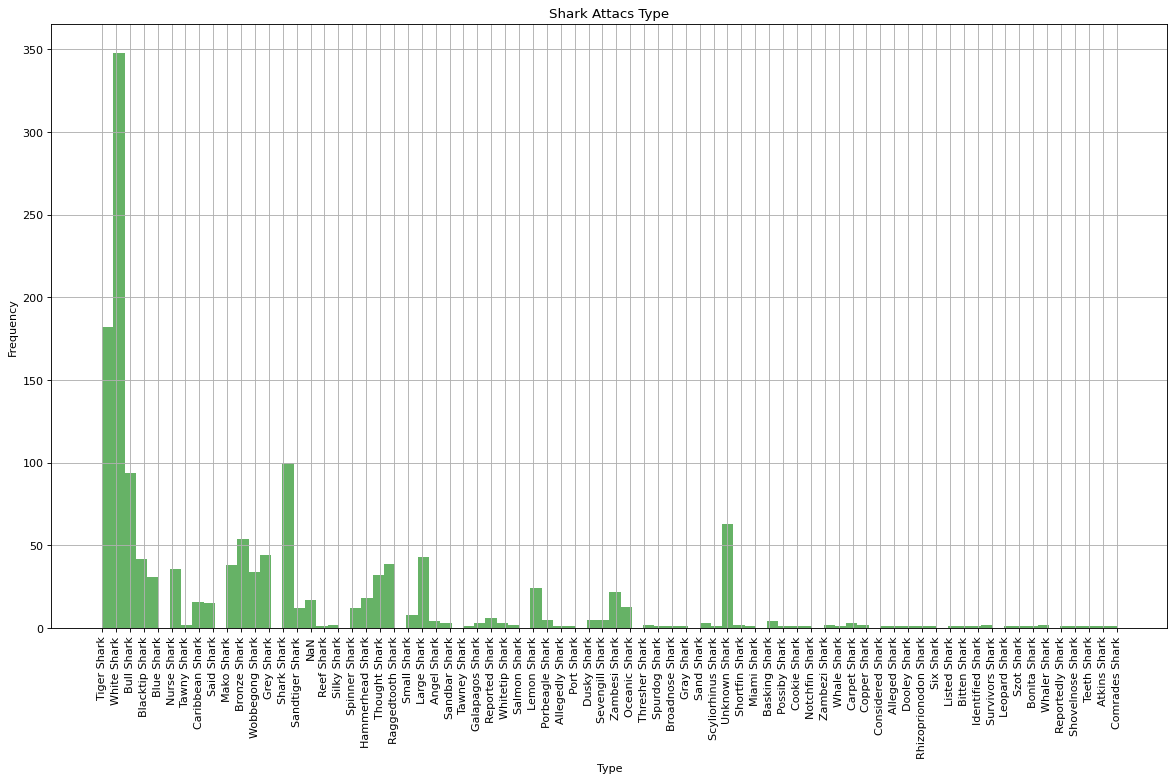

In [45]:
plt.figure(figsize=(18,10), dpi=80)
plt.title('Shark Attacs Type')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
dfsharkatt_c3['Species_c1'].hist( bins=90, color="green", alpha= 0.6)

## <span style="color:dark spring green"> 6. DataFrame Final para correlaciones <a name="id17"></a> 

Una vez trabajado los datos de cada columna de interes o variable, creamos un nuevo dataframe con las columnas de interes. 

In [46]:
dfsharkatt_c3['Year'] = dfsharkatt_c3['Date'].map(lambda x: x.year)
dfsharkatt_c3['Month'] = dfsharkatt_c3['Date'].map(lambda x: x.month)
dfsharkatt_c3['Day'] = dfsharkatt_c3['Date'].map(lambda x: x.day)
dfshatt_clean = dfsharkatt_c3[['Year', 'Month', 'Day','Time_c', 'Country', 'Area', 'Fatal_c', 'Sex_c', 'Age_c', 'Activity', 'Species_c1']].copy()
dfshatt_clean.head(3)

,Year,Month,Day,Time_c,Country,Area,Fatal_c,Sex_c,Age_c,Activity,Species_c1
0,2016,9,18,13,USA,Florida,N,M,16,Surfing,NaN
1,2016,9,18,11,USA,Florida,N,M,36,Surfing,NaN
2,2016,9,18,10,USA,Florida,N,M,43,Surfing,NaN


### <span style="color: dark orange"> 6.1. Ha existido algun cambio en el numero de ataques de tiburones a traves de los anos? <a name="id18"></a> 

En el grafico inferior observamos un incremento de los atques de tiburon a lo largo del tiempo a nivel mundial. Se presenta un primer pico en los anos 60's y posteeiormente un desceson de los ataques, hasta repuntar apartir del ano 2000. 

<AxesSubplot:title={'center':'Ataque de Tiburones en la linea del tiempo a nivel mundial'}, xlabel='Year'>

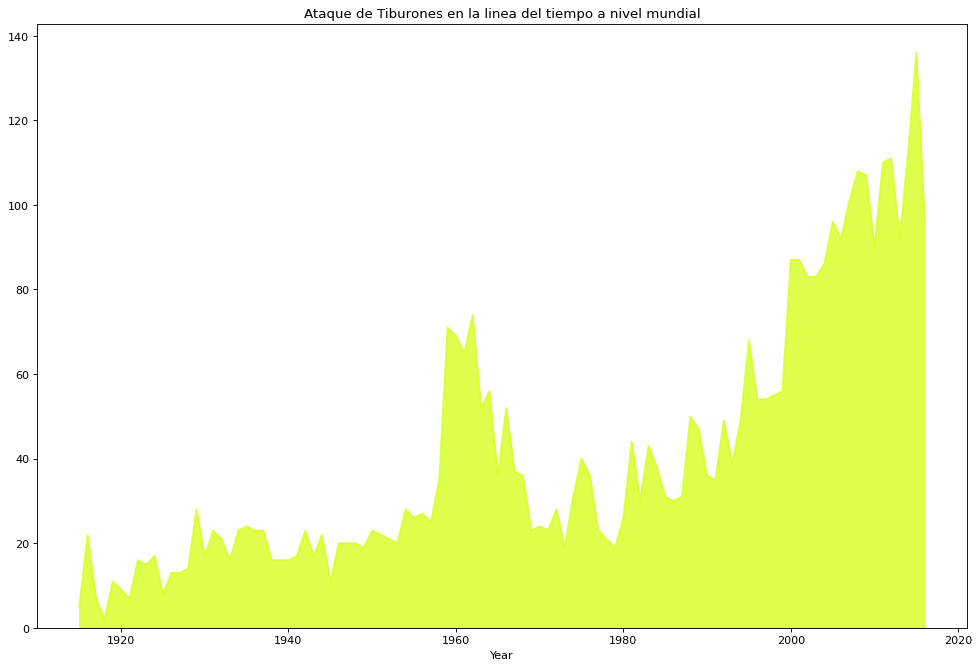

In [47]:
Years_val = dfshatt_clean['Year'].value_counts().sort_index()
plt.figure(figsize=(15,10), dpi=80)
plt.xlabel('Year')
Years_val.plot(title='Ataque de Tiburones en la linea del tiempo a nivel mundial', kind='area', stacked=False, alpha=0.85, color='#D9FF2D')

### <span style="color: dark orange"> 6.2. En que paises ocurren mas ataques de tiburon? <a name="id19"></a> 

En el grafico se muestra un dominacion de USA en cuanto ataques de Tiburones, seguido de Australia, South Africa, Brazil. Y paises como Bahamas, New Zeland, Papua New Guinea se muestran como paises con ataques no superiores a los 50 ataques desde el ano 1925 hasta el 2006. 

Text(0, 0.5, 'Pais')

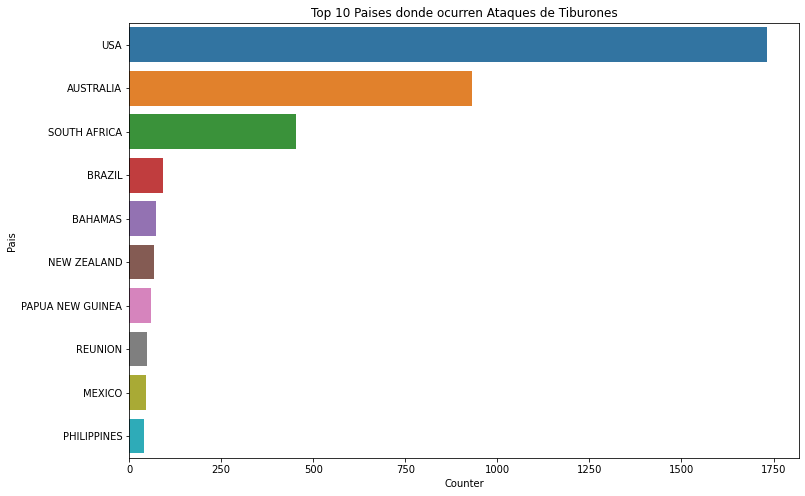

In [48]:
table_count = Counter(dfshatt_clean['Country'].dropna().tolist()).most_common(10)
table_count_index = [table[0] for table in table_count]
table_count_values = [table[1] for table in table_count]
fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(x = table_count_values , y=table_count_index,ax=ax,orient='h')
plt.title('Top 10 Paises donde ocurren Ataques de Tiburones')
plt.xlabel('Counter')
plt.ylabel('Pais')

### <span style="color: dark orange"> 6.3. Las perosnas atacadas por tiburones suelen ser poblacion joven o mayor?1<a name="id20"></a> 

Con una distribucion simple de los datos por medio de un histograma, observamos un sesgo de los datos hacia la izquierda considerando preferencialmente edades 15 y 30. Asi mismo se resaltan dos picos, la edad de 15 anos con mas de 200 muestras y la edad de 30 con alrededor de 150 muestras. Mas adelante observaremos si las edades se pueden relacionar a las actividades tops de ataques de tiburones.

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


([<matplotlib.axis.XTick at 0x1a71fd7c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

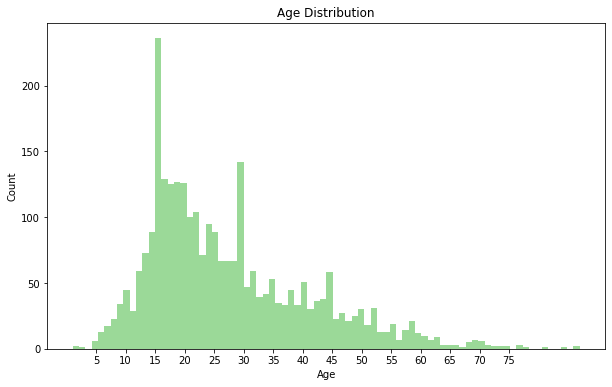

In [49]:
fig,ax = plt.subplots(figsize=(10,6))
ax = sns.distplot(dfshatt_clean['Age_c'].dropna().astype(np.int32),
             ax=ax,
             hist_kws={"alpha": 0.6, "color": "#58C053"},
             kde=False,bins=80)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.xticks(range(5, 80,5))

[Volver al Inicio.](#id3)

### <span style="color: dark orange"> 6.4. Que actividades relacionadas con el mar se ven mas expuestas a ataques de tiburones?<a name="id21"></a> 

El el grafico titulado **"Top 20 Actividades en el mar asociadas a Ataques de Tiburones"**, obeservamos que la actividad mas relacionada con los ataques de tiburones es Surfing, seguida de Swimming and Fisging. 


Text(0.5, 0, 'Counter')

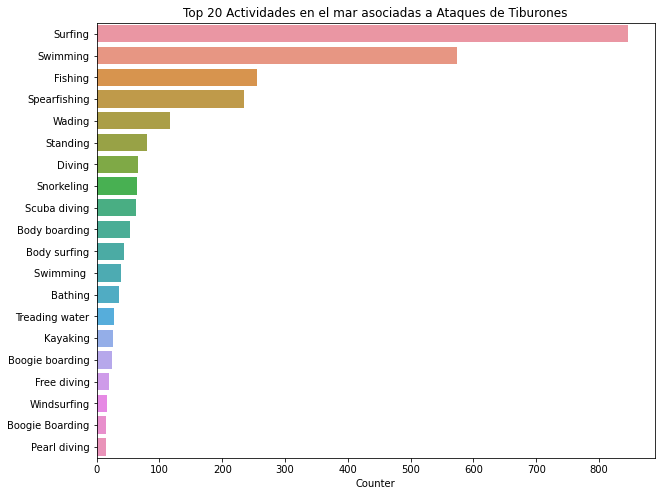

In [50]:
tab_c = Counter(dfshatt_clean['Activity'].dropna().tolist()).most_common(20)
tab_c_index = [table[0] for table in tab_c]
tab_c_values = [table[1] for table in tab_c]
fig,ax = plt.subplots(figsize=(10,8))
sns.barplot(x = tab_c_values , y=tab_c_index,ax=ax,orient='h')
plt.title('Top 20 Actividades en el mar asociadas a Ataques de Tiburones')
plt.xlabel('Counter')

Si combinamos la variable **Actividad vs Age**, observamos que Swimming y Surfing son las que mas fueron repostadas en ataques de tiburones entre personas de 14 y 24 anos. 

<AxesSubplot:title={'center':'Actividas y Edades relacionadas a los ataquesd de Tiburones'}, ylabel='Age_c'>

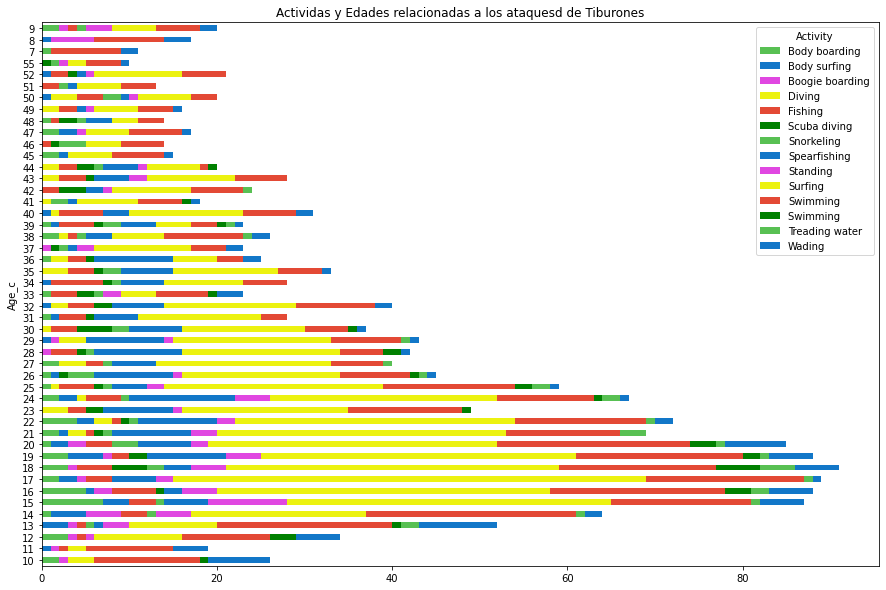

In [51]:
dfshatt_clean.groupby('Age_c').filter(lambda x: len(x) > 15)\
  .groupby('Activity').filter(lambda x: len(x) > 20)\
  .groupby(['Activity',"Age_c"])\
  .size().to_frame().unstack(level=0)[0].plot.barh(title= "Actividas y Edades relacionadas a los ataquesd de Tiburones",stacked=True,color=['#58C053','#1277C8','#E047E1', '#ECF210', '#E34935', 'green'], figsize=(15, 10))


Si combinamos la variable **Actividad vs Sex**, observamos que en mayor proporcion hay **mas ataques para hombres haciendo surfing** que mujeres, y en proporcion mas ataques de mujeres realizando swimming que a los hombres. 

**Nota:** Curiosamente podriamos sacar de esta muestra que hay actividades que las mujeres no practican como lo es Spearfishing o Fishing. 

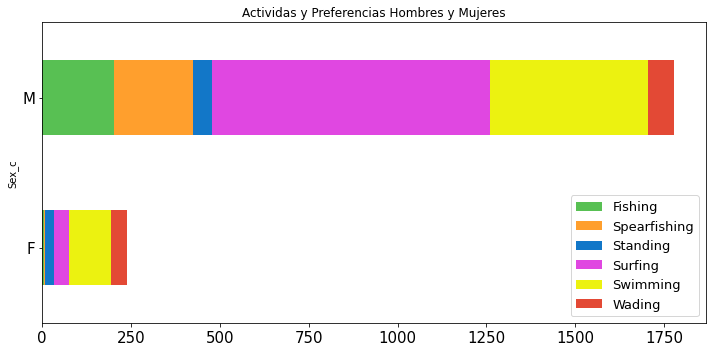

In [52]:
dfshatt_clean.groupby('Sex_c').filter(lambda x: len(x) >30)\
  .groupby('Activity').filter(lambda x: len(x) > 70)\
  .groupby(['Activity',"Sex_c"])\
  .size().to_frame().unstack(level=0)[0].plot.barh(title= "Actividas y Preferencias Hombres y Mujeres", stacked=True,color=['#58C053','#FF9F2D','#1277C8','#E047E1', '#ECF210', '#E34935' ], figsize=(10, 5), fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
h,l = ax.get_legend_handles_labels()
plt.legend( loc=4, fontsize=13)
plt.show()

### <span style="color: dark orange"> 6.5. Que tiburones atacan mas?<a name="id22"></a> 

En el grafico con el titulo **"Top 5 especies mas peligrosas de Tiburones"** observamos que la especie de White Shark es la que mas presenta casos, seguida por Tiger Shark.

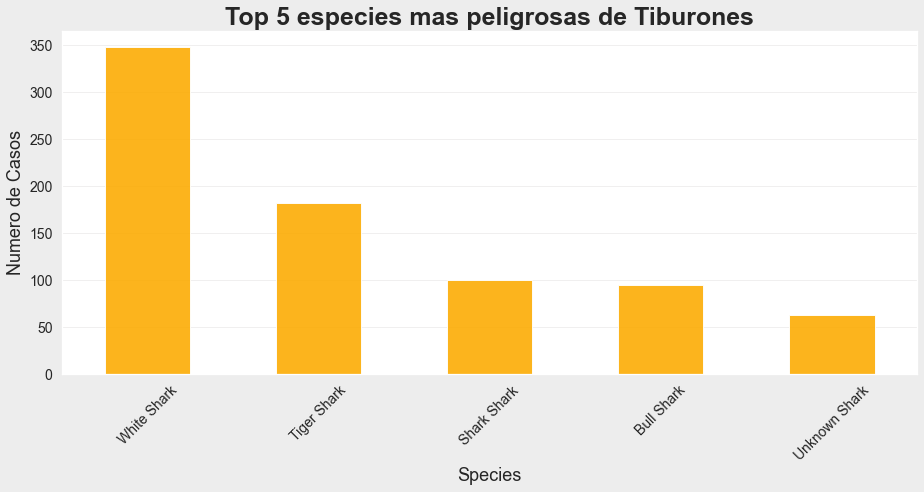

In [53]:
top = dfshatt_clean.Species_c1.value_counts().head(5)

sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'#EDEDED'})
top.plot(kind='bar', figsize=(13, 7), alpha=0.9, color='#FCAC04', rot=45, fontsize=9)
plt.xlabel('Species', fontsize=18)
plt.ylabel('Numero de Casos', fontsize=18)
plt.title('Top 5 especies mas peligrosas de Tiburones', fontsize=25, fontweight='bold')
plt.grid(color='#D3CFCF', axis='y', alpha=0.4, lw=0.8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

En el grafico siguiente, observamos la relacion entre la **Actividad que estaba haciendo la persona al momento del ataque y la Especie de Tiburon** que ha atacado. El **White Shark** es que resalta en los ataques de las top 4 actividad. Igualmente podemos encontrar especies que solo estan presentes en actividades relacionadas con Fishing, Spreadfishing y Swimming y esto puede estar relacionado a aguas mas tranquilas.

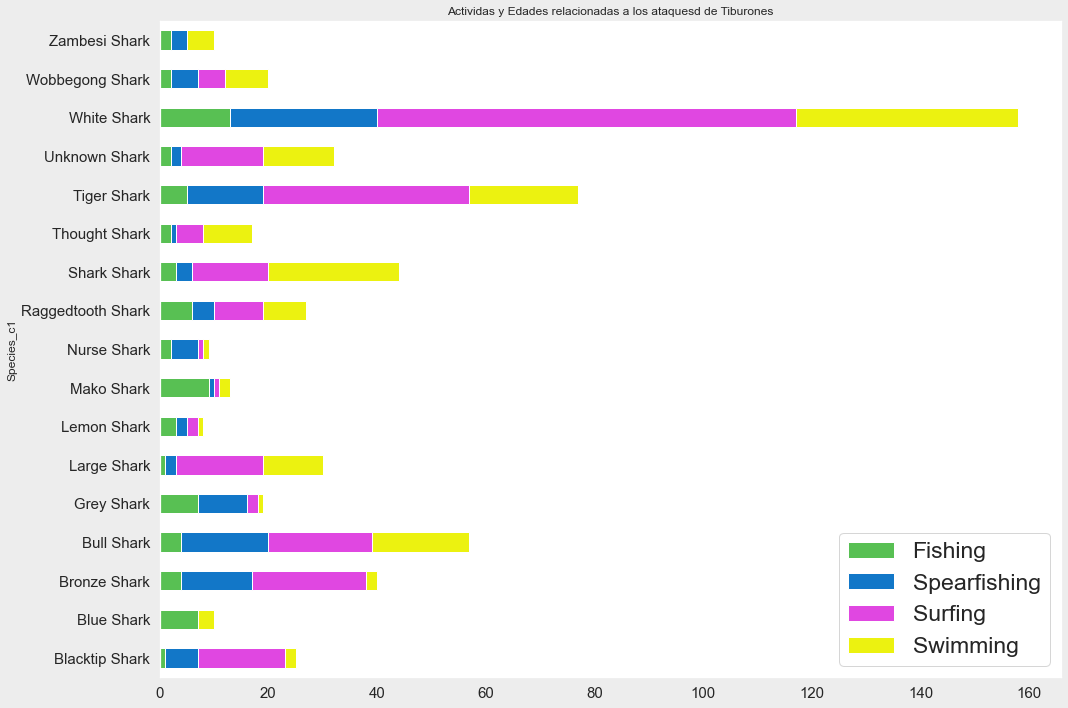

In [54]:
dfshatt_clean.groupby('Species_c1').filter(lambda x: len(x) > 20)\
  .groupby('Activity').filter(lambda x: len(x) > 70)\
  .groupby(['Activity',"Species_c1"])\
  .size().to_frame().unstack(level=0)[0].plot.barh(title= "Actividas y Edades relacionadas a los ataquesd de Tiburones", stacked=True,color=['#58C053','#1277C8','#E047E1', '#ECF210', '#E34935', 'green'], figsize=(15, 10), fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
h,l = ax.get_legend_handles_labels()
plt.legend( loc=4, fontsize=23)
plt.show()

[Volver al Inicio.](#id3)

### <span style="color: dark orange"> 6.6. Son los aqaques de tiburones mayormente fatales? Que especie de tiburon esta mas relacionada con los casos fatales<a name="id23"></a> 


En general observamos que los **ataques de tiburones no son fatales**. En esta muestra solo por debajo de un 15% llegan a ser fatales. 

Hay Tiburones como la especie de Wobbegong Shark, o Lemon Shark. Seria interesante relacionar esto con el habita de estos Tiburones. 

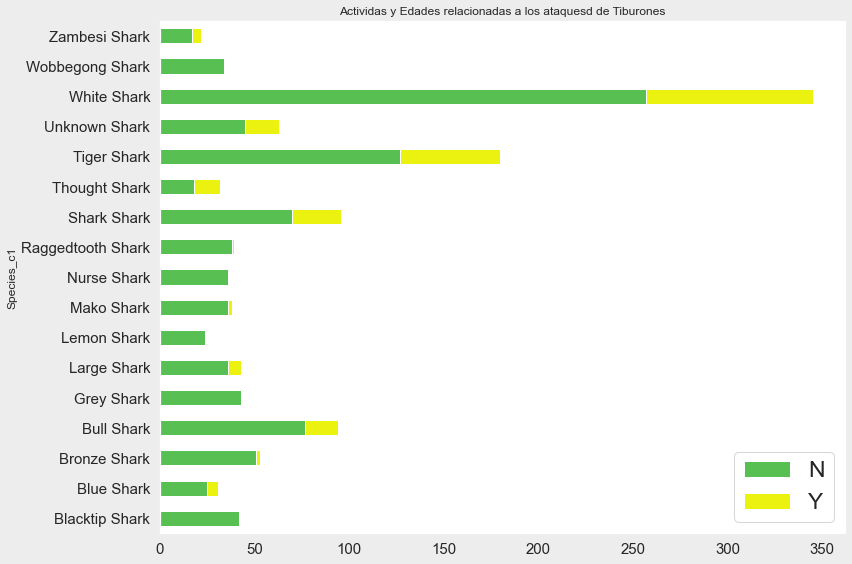

In [55]:
dfshatt_clean.groupby('Species_c1').filter(lambda x: len(x) > 20)\
  .groupby('Fatal_c').filter(lambda x: len(x) > 70)\
  .groupby(['Fatal_c',"Species_c1"])\
  .size().to_frame().unstack(level=0)[0].plot.barh(title= "Actividas y Edades relacionadas a los ataquesd de Tiburones", stacked=True,color=['#58C053', '#ECF210',], figsize=(12, 8), fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
h,l = ax.get_legend_handles_labels()
plt.legend( loc=4, fontsize=23)
plt.show()

### <span style="color: dark orange"> 6.7. En que pais se han dados mas casos fatales de ataques de tiburon?<a name="id24"></a> 

En el siguiente grafico podemos observar que el **White Shark** presenta mayor proporcion en los paises de **USA, AUSTRALIA y SOUTH AFRICA** en el mismo orden relacionado a proporcion. Vemos como datos extras que tiburones como Nurse Shark solo han sido reportados en USA y el Bronzon Shark es normalmente reportado en AUSTRALIA.

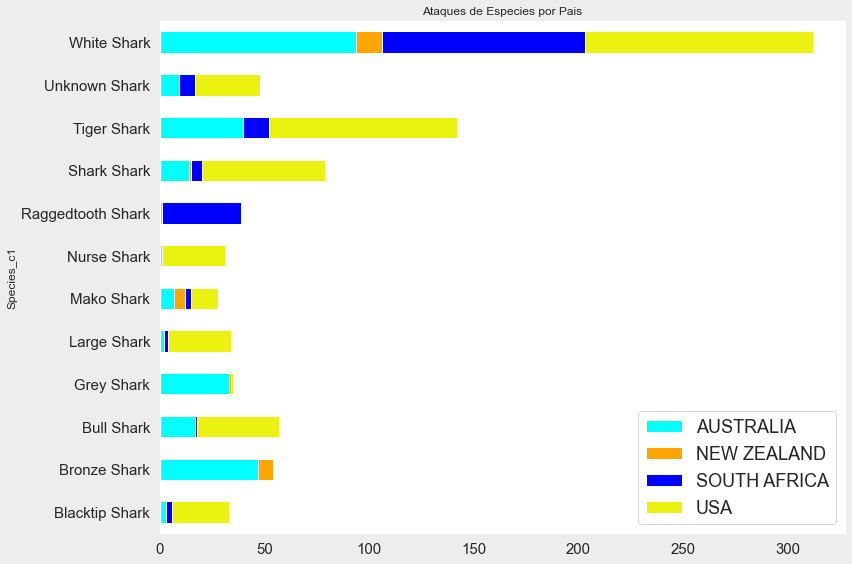

In [56]:
dfsharkatt_c3.groupby("Species_c1").filter(lambda x: len(x) > 35)\
  .groupby("Country").filter(lambda x: len(x) > 20)\
  .groupby(["Country","Species_c1"])\
  .size().to_frame().unstack(level=0)[0].plot.barh(title= "Ataques de Especies por Pais",stacked=True,color=['aqua','orange','blue','#ECF210'], figsize=(12, 8), fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
h,l = ax.get_legend_handles_labels()
plt.legend( loc=4, fontsize=18)
plt.show()

### <span style="color: dark orange"> 6.8. Existe alguna relacion entre la hora del ataque y los ataques segun las especies?<a name="id25"></a> 

En el grafico de calor se muestra la relacion entre la especie y la hora del ataque. La informacion que resalta es la del White Shark que tiene una ventana de tiempo de ataque bastante amplio desde las 9 a las 17hrs, con picos marcados entre las 9-10hrs.  

<AxesSubplot:xlabel='Species_c1', ylabel='Time_c'>

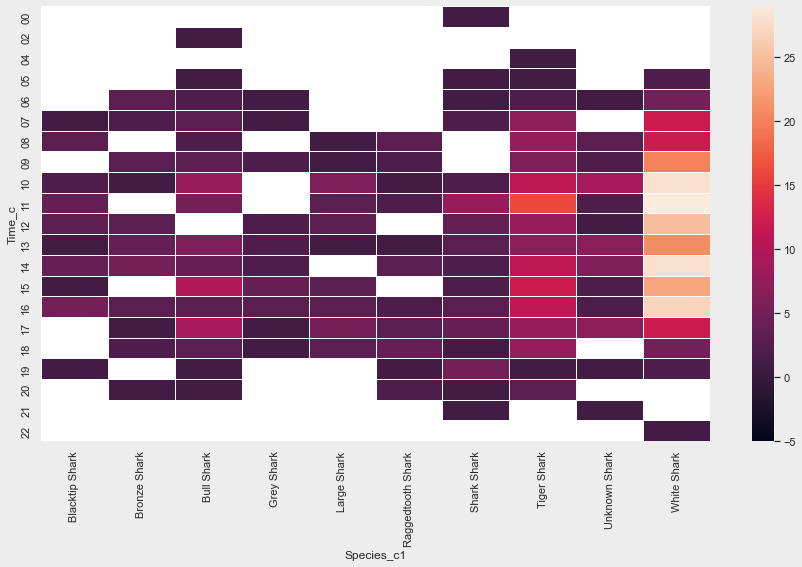

In [57]:
table_count = dfshatt_clean.groupby(dfshatt_clean['Species_c1'])['Time_c'].size()
table_count = table_count.sort_values(ascending=False)[:10]
table_count_index = table_count.index
table_count_values = table_count.values

table_count = pd.pivot_table(data = dfshatt_clean[dfshatt_clean['Species_c1'].isin(table_count_index)],
               index = ['Time_c'],columns=['Species_c1'],values=['Year'],aggfunc='count')
fig,ax = plt.subplots(figsize=(15,8))
sns.heatmap(table_count['Year'],ax=ax,vmin=-5,linewidth=.8,annot=False)

### <span style="color: dark orange"> 6.9. Los ataques estan mas relacionados a hombres o mujeres? Existe alguna relacion con el sexo y los ataques fatales?<a name="id26"></a> 

En el grafico observamos que los ataques reportados en esta muestra corresponden en gran proporcion a ataques sucedidos a Hombres. En proporcion los ataques de Tiburon terminan teniendo un rango mas alto de **fatalidad con ataques asociados a los hombres que con los ataques relacionado a las mujeres**. 

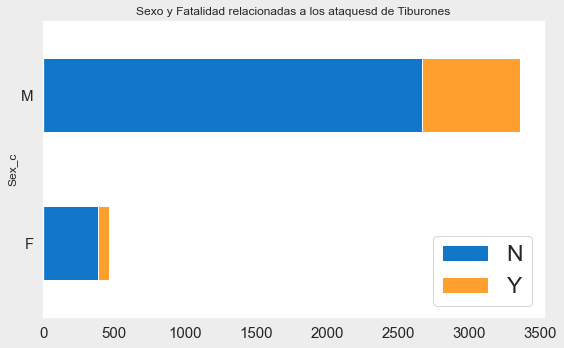

In [58]:
dfshatt_clean.groupby('Sex_c').filter(lambda x: len(x) > 20)\
  .groupby('Fatal_c').filter(lambda x: len(x) > 70)\
  .groupby(['Fatal_c',"Sex_c"])\
  .size().to_frame().unstack(level=0)[0].plot.barh(title= "Sexo y Fatalidad relacionadas a los ataquesd de Tiburones", stacked=True,color=['#1277C8', '#FF9F2D'], figsize=(8, 5), fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
h,l = ax.get_legend_handles_labels()
plt.legend( loc=4, fontsize=23)
plt.show()

### <span style="color: dark orange"> 6.10. Cuales son las areas de USA, Australia y South Africa mas peligros?<a name="id27"></a> 

Con el grafico que vemos seguidamente logramos resaltar el area mas peligrasa para los tres paises. Asi tenemos que para USA es Florida, por California y Hawaii. Seguidamente tenos a
Australia New South Wales, seguida de Queensland y Western Australia. Finalmente en South Africa KwaZulu-Natal seguida de Eastern Cape Province y Western Cape Province.

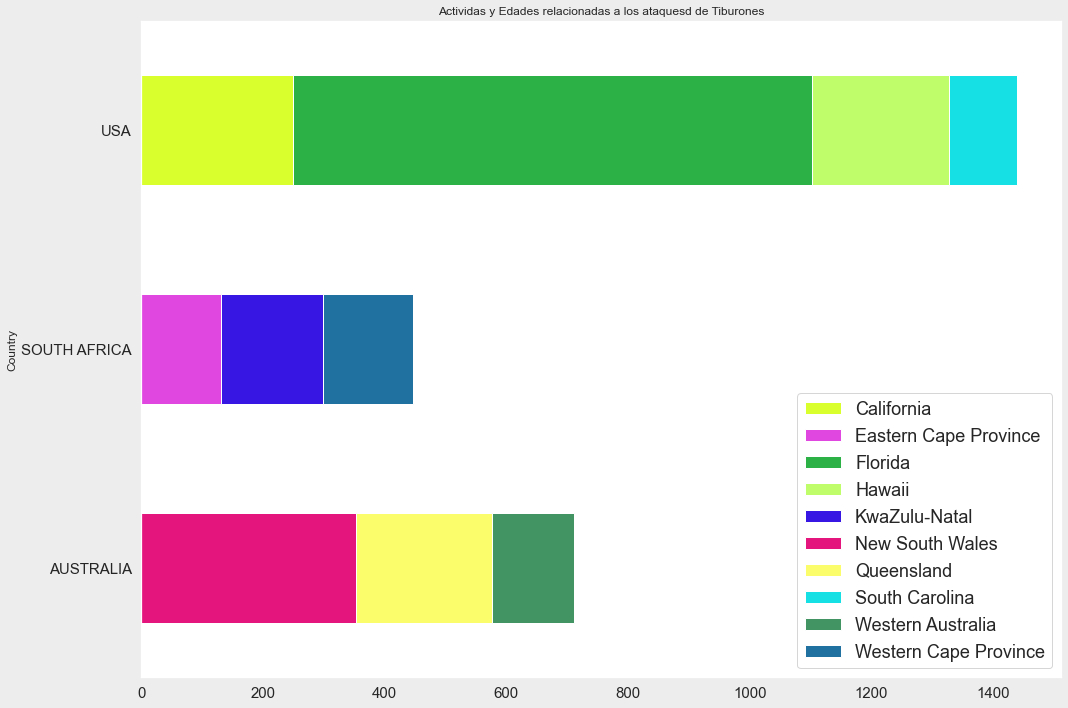

In [59]:
dfshatt_clean.groupby('Country').filter(lambda x: len(x) > 70)\
  .groupby('Area').filter(lambda x: len(x) > 80)\
  .groupby(['Area',"Country"])\
  .size().to_frame().unstack(level=0)[0].plot.barh(title= "Actividas y Edades relacionadas a los ataquesd de Tiburones",stacked=True,color=['#D9FF2D','#E047E1', '#2CB147', '#C0FD6B', '#3716E4', '#E4167E', '#FCFD6B', '#16E0E4', '#429463', '#2071A0'], figsize=(15, 10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
h,l = ax.get_legend_handles_labels()
plt.legend( loc=4, fontsize=18)
plt.show()

[Volver al Inicio.](#id3)

## <span style="color:dark spring green"> 7. Summing Up<a name="id28"></a> 

En cuanto a la data encontrada en el dataframe se puede concluir:

1. Los ataques de tiburones son fatales solo en un 15%
2. La especie de tiburon que mas suele atacar es el White Shark seguido del Tigger Shark
3. Los hombres son los mas involucrados a ataques de tiburones, y esto puede relacionarse con que la actividad del surfing que es una actividad claramente mas activa para hombres que para mujeres
4. El pais con mas ataques reportados es USA en Florida, seguido de Australia en New South Wales
5. La edad de las victimas en su mayoria se encuentra en un rango de 15 a 22 años, este mismo rango de edad es donde se encuentra la concentracion de datos relacionados con Surfing y Swimming
6. Se resalta que en la data reportada para mujeres, reportando las actividades durante ataques, no se encuentran actividades relacionadas con fishing
7. Existen especies que no han reportado ataques fatales
8. Hay evidencia de especies de Tiburones que solo atacan en actividades relacionadas a swwiming o standing, lo que se podria interpretar como una especie que habita en agua tranquilas
